In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-efa094d382a4>:28: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ab = pd.read_csv('/content/drive/Shareddrives/IGKR24_Ashkan Taheri/GPL570-55999 (1).csv', skiprows=16)  # Reading data from a CSV file into a DataFrame 'ab' and skipping 16 rows since they aren't important and made the code to return error


Original DataFrame:


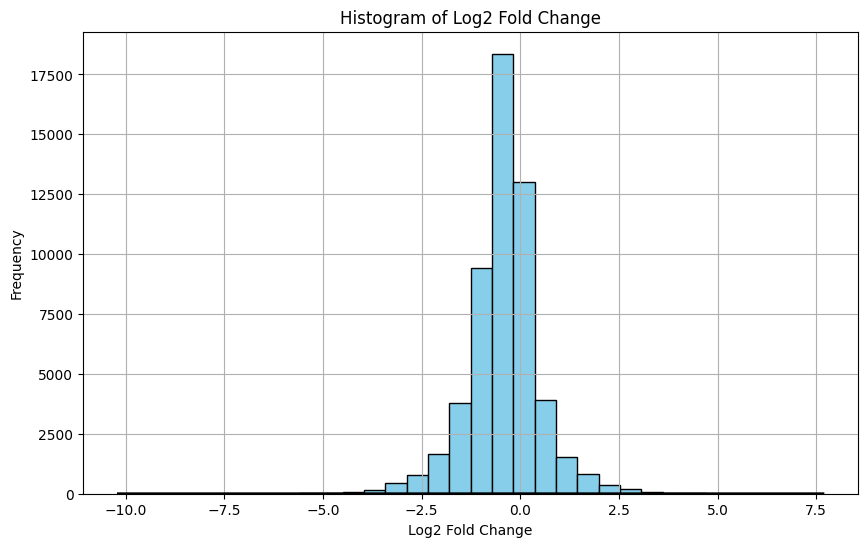

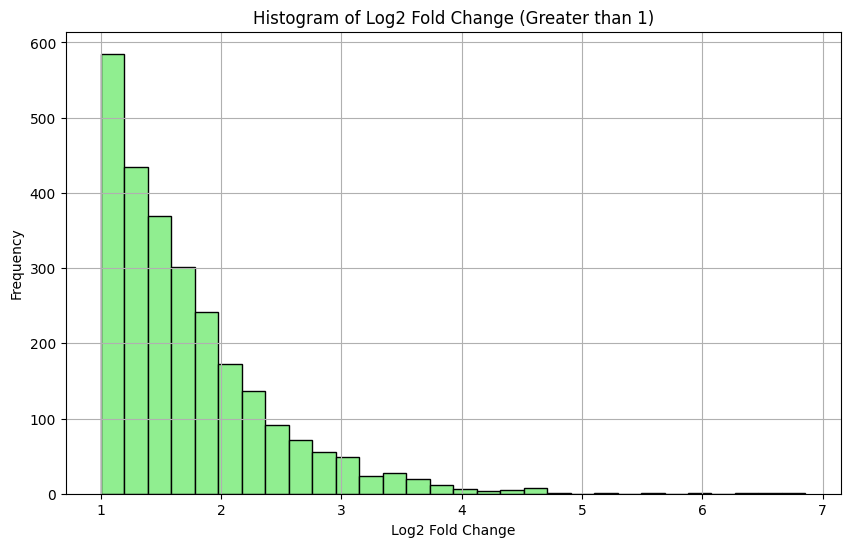

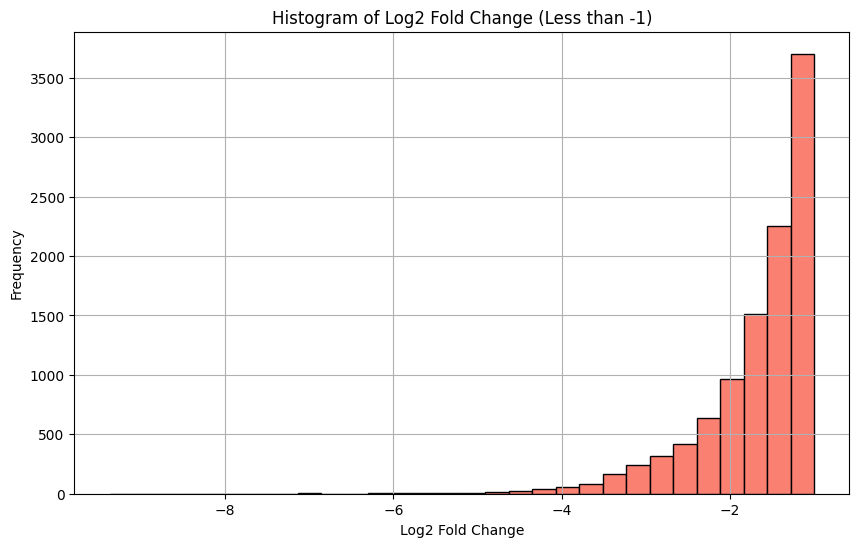

436
508


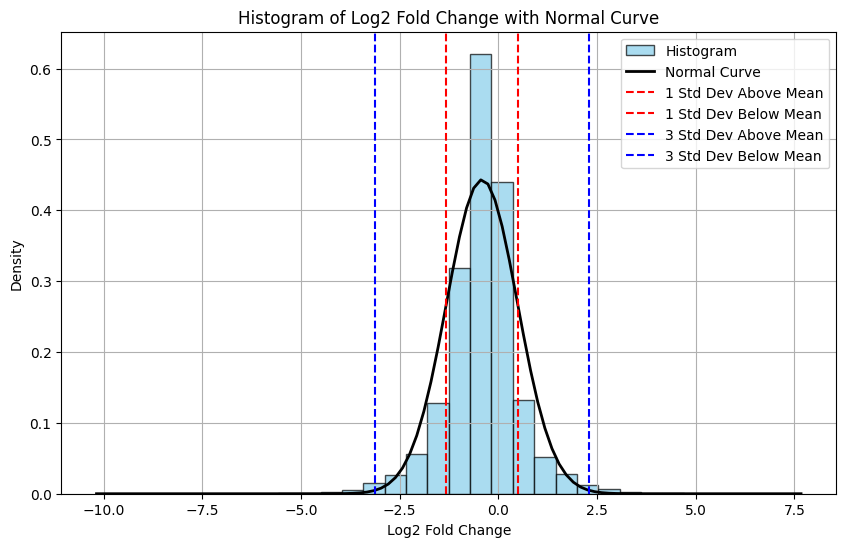

In [2]:
"""
Purpose:
Reading data from CSV files into DataFrames and performing data analysis on gene expression data.

Variables:
- df (DataFrame): Contains gene expression data from the main dataset.
- ab (DataFrame): Contains additional data related to gene expression.
- df_filtered (DataFrame): Contains gene expression data after removing rows with missing values.
- mu (float): Mean of the 'log 2 fold change' column.
- std (float): Standard deviation of the 'log 2 fold change' column.
- is_greater (Series): Boolean Series indicating whether 'log 2 fold change' is greater than 1.
- is_less (Series): Boolean Series indicating whether 'log 2 fold change' is less than -1.
- genes_within_1_std_above (DataFrame): Subset of genes with 'log 2 fold change' greater than one standard deviation above the mean.
- genes_within_1_std_below (DataFrame): Subset of genes with 'log 2 fold change' less than one standard deviation below the mean.
- genes_within_3_std_above (DataFrame): Subset of genes with 'log 2 fold change' greater than two standard deviations above the mean.
- genes_within_3_std_below (DataFrame): Subset of genes with 'log 2 fold change' less than two standard deviations below the mean.
"""

import pandas as pd  # Importing pandas library and aliasing it as 'pd'
from scipy.stats import norm  # Importing norm function from scipy.stats library
import numpy as np  # Importing numpy library and aliasing it as 'np'
import matplotlib.pyplot as plt# Importing pyplot module from matplotlib library and aliasing it as 'plt'
from collections import Counter# Importing Counter class from collections module
import matplotlib.pyplot as abc # Importing pyplot module from matplotlib library and aliasing it as 'abc'

# Reading data from CSV files into DataFrames
df = pd.read_csv('/content/drive/Shareddrives/IGKR24_Ashkan Taheri/GSE28379 - GSE28379_series_matrix.csv')  # Reading data from a CSV file into a DataFrame 'df'
ab = pd.read_csv('/content/drive/Shareddrives/IGKR24_Ashkan Taheri/GPL570-55999 (1).csv', skiprows=16)  # Reading data from a CSV file into a DataFrame 'ab' and skipping 16 rows since they aren't important and made the code to return error

# Dropping rows with missing values from DataFrame
df_filtered = df.dropna(axis=0)  # Dropping rows with missing values along axis 0 (rows) and assigning the result to 'df_filtered'

# Calculating mean and standard deviation of 'log 2 fold change' column
mu, std = norm.fit(df_filtered['log 2 fold change'])  # Calculating mean and standard deviation of 'log 2 fold change' column and assigning them to 'mu' and 'std' respectively


# Display the original DataFrame
print("Original DataFrame:")

# Filter DataFrame to filter genes with < -1 and > 1 log2(FC)
is_greater = df.loc[:]['log 2 fold change']>1
is_less = df.loc[:]['log 2 fold change']<-1
df[is_greater]

"""
Creating histogram of Log2 Fold Change in order to see the distribution of
data and see the concentration of gene expression on the graph.
"""
# Plotting histogram for the entire dataset
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.hist(df['log 2 fold change'], bins=30, color='skyblue', edgecolor='black')  # Creating a histogram with specified parameters
plt.title('Histogram of Log2 Fold Change')  # Setting the title of the plot
plt.xlabel('Log2 Fold Change')  # Setting the label for x-axis
plt.ylabel('Frequency')  # Setting the label for y-axis
plt.grid(True)  # Enabling grid on the plot
xmin, xmax = plt.xlim()  # Getting the current limits of the x-axis
x = np.linspace(xmin, xmax, 100)  # Creating an array of evenly spaced values for x-axis
p = norm.pdf(x, mu, std)  # Calculating the probability density function
plt.plot(x, p, 'k', linewidth=2)  # Plotting the probability density function
plt.show()  # Displaying the plot

# Plotting histograms for log2 fold changes greater than 1 and less than -1
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.hist(df['log 2 fold change'][is_greater], bins=30, color='lightgreen', edgecolor='black')  # Creating a histogram with specified parameters
plt.title('Histogram of Log2 Fold Change (Greater than 1)')  # Setting the title of the plot
plt.xlabel('Log2 Fold Change')  # Setting the label for x-axis
plt.ylabel('Frequency')  # Setting the label for y-axis
plt.grid(True)  # Enabling grid on the plot
plt.show()  # Displaying the plot

plt.figure(figsize=(10, 6))  # Setting the figure size
plt.hist(df['log 2 fold change'][is_less], bins=30, color='salmon', edgecolor='black')  # Creating a histogram with specified parameters
plt.title('Histogram of Log2 Fold Change (Less than -1)')  # Setting the title of the plot
plt.xlabel('Log2 Fold Change')  # Setting the label for x-axis
plt.ylabel('Frequency')  # Setting the label for y-axis
plt.grid(True)  # Enabling grid on the plot
plt.show()  # Displaying the plot

# Calculate mean and standard deviation
mu = df['log 2 fold change'].mean()  # Calculating the mean of 'log 2 fold change' column
std = df['log 2 fold change'].std()  # Calculating the standard deviation of 'log 2 fold change' column

# Plot histogram with normal curve
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.hist(df['log 2 fold change'], bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')  # Creating a histogram with specified parameters
plt.title('Histogram of Log2 Fold Change with Normal Curve')  # Setting the title of the plot
plt.xlabel('Log2 Fold Change')  # Setting the label for x-axis
plt.ylabel('Density')  # Setting the label for y-axis
plt.grid(True)  # Enabling grid on the plot

# Plot normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)  # Creating an array of evenly spaced values for x-axis
p = norm.pdf(x, mu, std)  # Calculating the probability density function
plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')  # Plotting the probability density function

# Find number of genes within specific standard deviations
std_1_above = mu + std  # Calculating one standard deviation above the mean
std_1_below = mu - std  # Calculating one standard deviation below the mean
std_3_above = mu + 3 * std  # Calculating three standard deviations above the mean
std_3_below = mu - 3 * std  # Calculating three standard deviations below the mean

# Calculating number of genes within specific standard deviations
genes_within_1_std_above = df[(df['log 2 fold change'] > std_1_above)]  # Filtering DataFrame for genes with log2 fold change greater than one standard deviation above the mean
genes_within_1_std_below = df[(df['log 2 fold change'] < std_1_below)]  # Filtering DataFrame for genes with log2 fold change less than one standard deviation below the mean
genes_within_3_std_above = df[(df['log 2 fold change'] > std_3_above)]  # Filtering DataFrame for genes with log2 fold change greater than three standard deviations above the mean
genes_within_3_std_below = df[(df['log 2 fold change'] < std_3_below)]  # Filtering DataFrame for genes with log2 fold change less than three standard deviations below the mean
print(len(genes_within_3_std_above))
print(len(genes_within_3_std_below))
plt.axvline(std_1_above, color='r', linestyle='--', label='1 Std Dev Above Mean')  # Adding a vertical line for one standard deviation above the mean
plt.axvline(std_1_below, color='r', linestyle='--', label='1 Std Dev Below Mean')  # Adding a vertical line for one standard deviation below the mean
plt.axvline(std_3_above, color='b', linestyle='--', label='3 Std Dev Above Mean')  # Adding a vertical line for three standard deviations above the mean
plt.axvline(std_3_below, color='b', linestyle='--', label='3 Std Dev Below Mean')  # Adding a vertical line for three standard deviations below the mean
plt.legend()  # Adding legend to the plot
plt.show()  # Displaying the plot

In [3]:
"""
Purpose:
Performing further analysis on gene expression data to identify unaffected genes and their associated functions.

Variables:
- mu (float): Mean of the 'log 2 fold change' column.
- std (float): Standard deviation of the 'log 2 fold change' column.
- std_unaffected_above (float): Threshold for unaffected genes, one standard deviation above the mean.
- std_unaffected_below (float): Threshold for unaffected genes, one standard deviation below the mean.
- genes_within_unaffected (DataFrame): Subset of genes considered unaffected based on log2 fold change thresholds.
- gene_ids_unaffected (Series): Gene IDs of unaffected genes.
- matched_gene_id (list): List of gene IDs that match between main dataset and additional data.
- gene_function (dict): Dictionary containing matched gene IDs as keys and their associated functions as values.
- all_unaffected (list): List of all associated functions of unaffected genes.
- process_count (Counter): Counter object counting the occurrences of each associated function.
- most_common_unaffected (list): List of tuples containing the most common associated functions and their counts.
"""
std_unaffected_above = 0.6
std_unaffected_below = -0.6
genes_within_unaffected = df[(df['log 2 fold change'] < std_unaffected_above)]
genes_within_unaffected = genes_within_unaffected[(genes_within_unaffected['log 2 fold change'] > std_unaffected_below)]

gene_ids_unaffected = df.loc[genes_within_unaffected.index, 'ID_REF']
matched_gene_id = []
for a in ab['ID']:
    if a in gene_ids_unaffected.values:
        matched_gene_id.append(a)

# Initializing dictionary to store gene functions
gene_function = {}

# Populating the dictionary with matched gene IDs and their associated functions
for index, row in ab.iterrows():  # Iterating through each row in DataFrame 'ab'
    save = []  # Initializing a list to store associated functions
    if row['ID'] in matched_gene_id:  # Checking if the gene ID is in matched gene IDs
        for ex in str(row['Gene Ontology Biological Process']).split("///"):  # Splitting the biological process by '///'
            if ex != "nan":  # Checking if the process is not NaN
                save.append(ex.split("//")[1])  # Appending the process to 'save'
        gene_function[row['ID']] = save  # Storing the gene ID and its associated functions in 'gene_functions'


# Extracting all associated functions of unaffected genes
all_unaffected = [process for processes in gene_function.values() for process in processes]

# Counting occurrences of each associated function
process_count = Counter(all_unaffected)

# Finding the most common associated functions
most_common_unaffected = process_count.most_common()


Top 20 Most Commonly unaffected Biological Processes:
 regulation of transcription, DNA-templated  = 3780
 transcription, DNA-templated  = 3587
 metabolic process  = 2592
 transport  = 2485
 signal transduction  = 2398
 small molecule metabolic process  = 2032
 positive regulation of transcription from RNA polymerase II promoter  = 1464
 multicellular organismal development  = 1425
 gene expression  = 1359
 apoptotic process  = 1267
 phosphorylation  = 1243
 protein transport  = 1177
 positive regulation of transcription, DNA-templated  = 1159
 cell cycle  = 1132
 protein phosphorylation  = 1119
 negative regulation of transcription from RNA polymerase II promoter  = 1090
 viral process  = 1084
 innate immune response  = 1070
 cell differentiation  = 987
 negative regulation of transcription, DNA-templated  = 964


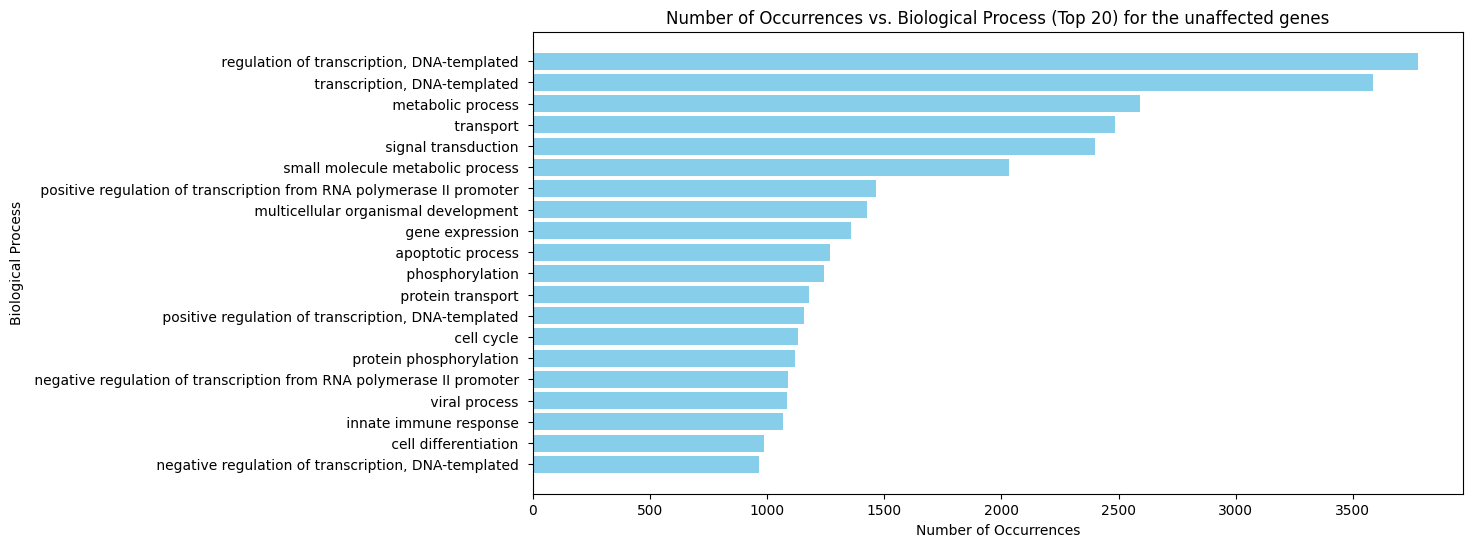

In [4]:
"""
Purpose:
Identifying the top 20 most common biological processes associated with unaffected genes and visualizing their occurrences.

Variables:
- most_common_unaffected (list): List of tuples containing the most common associated functions and their counts.
- genes_with_common_process (dict): Dictionary mapping gene IDs to lists of associated common processes.
- top_unaffected (list): List of top 20 most common biological processes which were unaffected.
- top_occurrence_unaffected (list): List of counts of the top 20 most common biological processes.
"""

print("Top 20 Most Commonly unaffected Biological Processes:")
for process, count in most_common_unaffected[:20]:  # Loop through the first 20 elements of most_common_processes
    print(process, "=", count)

# Initialize a dictionary to store genes associated with the most common biological processes
genes_with_common_process = {}

"""
This following loop filters genes to find those with biological processes matching the most common processes observed among unaffected genes. If a gene has associated processes that match the most common unaffected processes, it's stored in genes_with_common_process.

Variables:

gene_id: Gene ID being processed.
processes: List of biological processes associated with the current gene.
most_common_unaffected: List of tuples containing the most common biological processes and their counts among unaffected genes.
common_processes: List of only the biological processes extracted from most_common_unaffected.
matched_processes: Processes associated with the current gene that match the most common unaffected processes.
genes_with_common_process: Dictionary to store gene IDs and their matching common processes.
"""
for gene_id, processes in gene_function.items():
    common_processes = [process for process, count in most_common_unaffected]
    matched_processes = [process for process in processes if process in common_processes]
    if matched_processes:
        genes_with_common_process[gene_id] = matched_processes

# Extracting the top 10 biological processes and their counts
top_unaffected = [process for process, count in most_common_unaffected[:20]]
top_occurrence_unaffected = [count for process, count in most_common_unaffected[:20]]

# Plotting the bar graph for top 10 processes
abc.figure(figsize=(12, 6))
abc.barh(top_unaffected, top_occurrence_unaffected, color='skyblue')
abc.xlabel('Number of Occurrences')
abc.ylabel('Biological Process')
abc.title('Number of Occurrences vs. Biological Process (Top 20) for the unaffected genes')
abc.gca().invert_yaxis()
abc.show()

Number of genes within 1 standard deviation above the mean: 5611  and percentage is: 10.26 %
Number of genes within 1 standard deviation below the mean: 6409  and percentage is: 11.72 %
Number of genes within 3 standard deviations above the mean: 436  and percentage is: 0.8 %
Number of genes within 3 standard deviations below the mean: 508  and percentage is: 0.93 %
Top 10 Most Commonly Differentially Regulated Biological Processes (Upregulated):
 signal transduction  = 57
 regulation of transcription, DNA-templated  = 41
 transcription, DNA-templated  = 35
 multicellular organismal development  = 29
 cell adhesion  = 25
 innate immune response  = 23
 G-protein coupled receptor signaling pathway  = 23
 small molecule metabolic process  = 22
 positive regulation of transcription from RNA polymerase II promoter  = 22
 metabolic process  = 20

Top 10 Most Commonly Differentially Regulated Biological Processes (Downregulated):
 transport  = 41
 regulation of transcription, DNA-templated  =

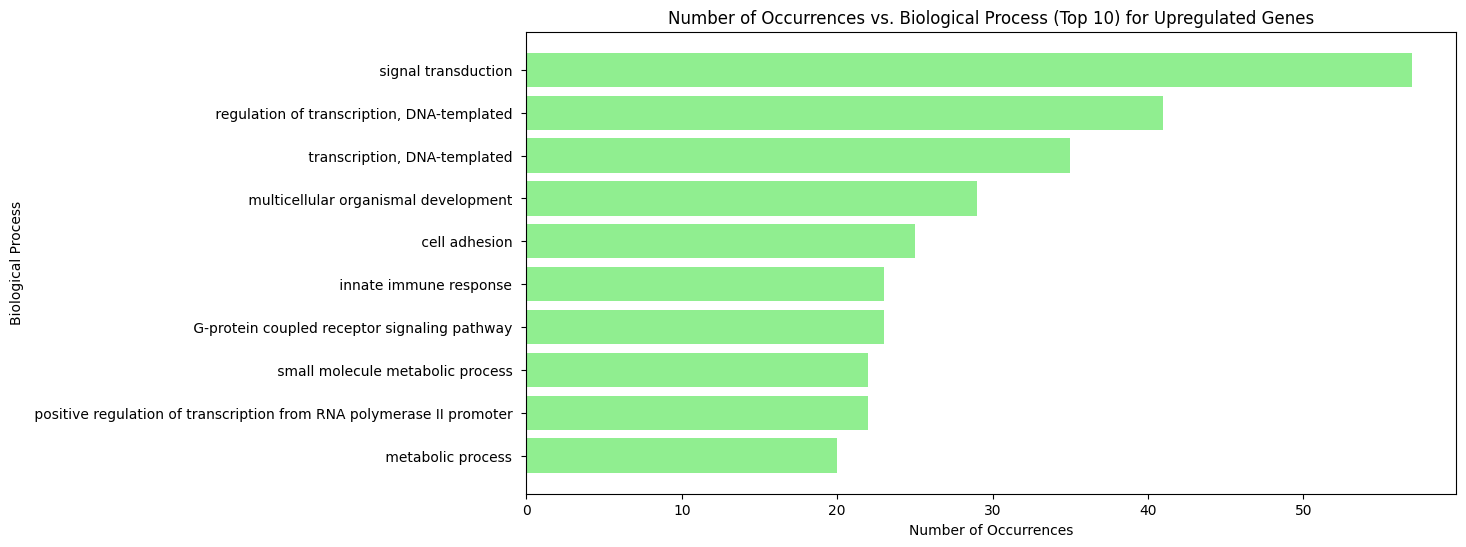

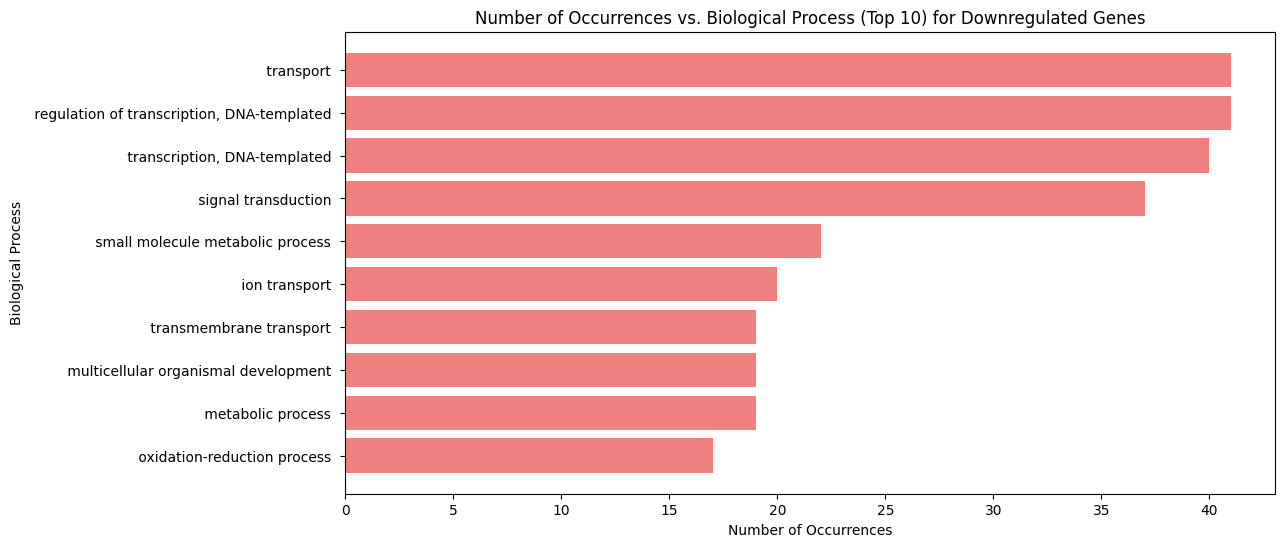

In [5]:
"""
Purpose:
Calculating the number of genes within each standard deviation and identifying the top 10 most common biological processes associated with differentially regulated genes.

Variables:
- genes_within_1_std_above (DataFrame): Subset of genes within one standard deviation above the mean.
- genes_within_1_std_below (DataFrame): Subset of genes within one standard deviation below the mean.
- genes_within_3_std_above (DataFrame): Subset of genes within three standard deviations above the mean.
- genes_within_3_std_below (DataFrame): Subset of genes within three standard deviations below the mean.
- gene_ids_above_3std (Series): Gene IDs for genes within three standard deviations above the mean.
- gene_ids_below_3std (Series): Gene IDs for genes within three standard deviations below the mean.
- matched_gene_ids (list): List of gene IDs that match between the main dataset and additional data.
- gene_functions (dict): Dictionary mapping gene IDs to lists of associated functions.
- all_3std_upregulated (list): List of all associated functions of upregulated genes within three standard deviations.
- all_3std_downregulated (list): List of all associated functions of downregulated genes within three standard deviations.
- process_counts_upregulated (Counter): Counter object counting the occurrences of each associated function for upregulated genes.
- process_counts_downregulated (Counter): Counter object counting the occurrences of each associated function for downregulated genes.
- most_common_processes_upregulated (list): List of tuples containing the most common associated functions and their counts for upregulated genes.
- most_common_processes_downregulated (list): List of tuples containing the most common associated functions and their counts for downregulated genes.
- top_affected_upregulated (list): List of top 10 most common biological processes for upregulated genes.
- top_occurrence_affected_upregulated (list): List of counts of the top 10 most common biological processes for upregulated genes.
- top_affected_downregulated (list): List of top 10 most common biological processes for downregulated genes.
- top_occurrence_affected_downregulated (list): List of counts of the top 10 most common biological processes for downregulated genes.
"""

# Print the number of genes within each standard deviation
print("Number of genes within 1 standard deviation above the mean:", len(genes_within_1_std_above), " and percentage is:", np.round((len(genes_within_1_std_above)/len(df))*100,2), "%")
print("Number of genes within 1 standard deviation below the mean:", len(genes_within_1_std_below), " and percentage is:", np.round((len(genes_within_1_std_below)/len(df))*100,2), "%")
print("Number of genes within 3 standard deviations above the mean:", len(genes_within_3_std_above), " and percentage is:", np.round((len(genes_within_3_std_above)/len(df))*100,2), "%")
print("Number of genes within 3 standard deviations below the mean:", len(genes_within_3_std_below), " and percentage is:", np.round((len(genes_within_3_std_below)/len(df))*100,2), "%")

# Extracting gene IDs for genes within 3 standard deviations above and below the mean
gene_ids_above_3std = df.loc[genes_within_3_std_above.index, 'ID_REF']
gene_ids_below_3std = df.loc[genes_within_3_std_below.index, 'ID_REF']

matched_gene_ids = []
for a in ab['ID']:
    if a in gene_ids_above_3std.values:
        matched_gene_ids.append(a)
    elif a in gene_ids_below_3std.values:
        matched_gene_ids.append(a)

# Initialize a dictionary to store gene IDs and their associated functions
gene_functions = {}

for index, row in ab.iterrows():
    save = []
    if row['ID'] in matched_gene_ids:
        for ex in str(row['Gene Ontology Biological Process']).split("///"):
            if ex != "nan":
                save.append(ex.split("//")[1])
        gene_functions[row['ID']] = save

# Separate lists for upregulated and downregulated processes
all_3std_upregulated = [process for gene_id in gene_ids_above_3std if gene_id in gene_functions for process in gene_functions[gene_id]]
all_3std_downregulated = [process for gene_id in gene_ids_below_3std if gene_id in gene_functions for process in gene_functions[gene_id]]

# Count occurrences of each biological process for upregulated and downregulated genes
process_counts_upregulated = Counter(all_3std_upregulated)
process_counts_downregulated = Counter(all_3std_downregulated)
process_counts = process_counts_upregulated + process_counts_downregulated

# The most_common() method of the Counter class returns a list of the n most common elements and their counts from the most common to the least
most_common_processes_upregulated = process_counts_upregulated.most_common()
most_common_processes_downregulated = process_counts_downregulated.most_common()
most_common_processes = most_common_processes_downregulated + most_common_processes_upregulated

print("Top 10 Most Commonly Differentially Regulated Biological Processes (Upregulated):")
for process, count in most_common_processes_upregulated[:10]:  # Loop through the first 10 elements of most_common_processes
    print(process, "=", count)

print("\nTop 10 Most Commonly Differentially Regulated Biological Processes (Downregulated):")
for process, count in most_common_processes_downregulated[:10]:  # Loop through the first 10 elements of most_common_processes
    print(process, "=", count)

# Extracting the top 10 most common biological processes and their counts from most_common_processes
top_affected_upregulated = [process for process, count in most_common_processes_upregulated[:10]]
top_occurrence_affected_upregulated = [count for process, count in most_common_processes_upregulated[:10]]

top_affected_downregulated = [process for process, count in most_common_processes_downregulated[:10]]
top_occurrence_affected_downregulated = [count for process, count in most_common_processes_downregulated[:10]]

# Plotting the bar graph for top 10 processes (Upregulated)
abc.figure(figsize=(12, 6))
abc.barh(top_affected_upregulated, top_occurrence_affected_upregulated, color='lightgreen')
abc.xlabel('Number of Occurrences')
abc.ylabel('Biological Process')
abc.title('Number of Occurrences vs. Biological Process (Top 10) for Upregulated Genes')
abc.gca().invert_yaxis()
abc.show()

# Plotting the bar graph for top 10 processes (Downregulated)
abc.figure(figsize=(12, 6))
abc.barh(top_affected_downregulated, top_occurrence_affected_downregulated, color='lightcoral')
abc.xlabel('Number of Occurrences')
abc.ylabel('Biological Process')
abc.title('Number of Occurrences vs. Biological Process (Top 10) for Downregulated Genes')
abc.gca().invert_yaxis()
abc.show()


 transport  - Common
 regulation of transcription, DNA-templated  - Common
 transcription, DNA-templated  - Common
 signal transduction  - Common
 small molecule metabolic process  - Common
 ion transport  - Affected
 transmembrane transport  - Affected
 multicellular organismal development  - Common
 metabolic process  - Common
 oxidation-reduction process  - Affected
 apoptotic process  - Common
 cell adhesion  - Affected
 synaptic transmission  - Affected
 negative regulation of transcription from RNA polymerase II promoter  - Common
 positive regulation of transcription from RNA polymerase II promoter  - Common
 protein phosphorylation  - Common
 immune response  - Affected
 innate immune response  - Common
 positive regulation of GTPase activity  - Affected
 blood coagulation  - Affected


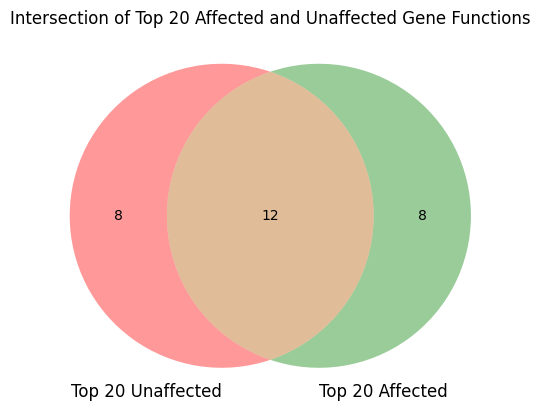

In [6]:
"""
Purpose:
Filtering the top 20 most common biological processes associated with both affected and unaffected genes and creating a Venn diagram to visualize their intersection.

Variables:
- top_unaffected (list): List of top 20 most common biological processes associated with unaffected genes.
- top_affected (list): List of top 20 most common biological processes associated with affected genes.
"""

from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Extracting the top 20 most common biological processes associated with unaffected genes
top_unaffected_processes = [process for process, count in most_common_unaffected[:20]]

# Extracting the top 20 most common biological processes associated with affected genes
top_affected_processes = [process for process, count in most_common_processes[:20]]

# Creating sets of top 20 biological processes for affected and unaffected genes
set_top_unaffected = set(top_unaffected_processes)
set_top_affected = set(top_affected_processes)

for process, count in most_common_processes[:20]:
    if process in top_unaffected_processes and process in top_affected_processes:
        print(process, "- Common")
    elif process in top_unaffected_processes:
        print(process, "- Unaffected")
    elif process in top_affected_processes:
        print(process, "- Affected")

# Creating a Venn diagram to visualize the intersection of top 20 biological processes
plt.figure(figsize=(6, 6))
venn2([set_top_unaffected, set_top_affected], ('Top 20 Unaffected', 'Top 20 Affected'))
plt.title('Intersection of Top 20 Affected and Unaffected Gene Functions')
plt.show()


Biological Processes associated with Unaffected Genes only:
 phosphorylation 
 positive regulation of transcription, DNA-templated 
 protein transport 
 negative regulation of transcription, DNA-templated 
 cell differentiation 
 cell cycle 
 viral process 
 gene expression 

Biological Processes associated with Affected Genes only:
 synaptic transmission 
 immune response 
 transmembrane transport 
 ion transport 
 cell adhesion 
 positive regulation of GTPase activity 
 oxidation-reduction process 
 blood coagulation 


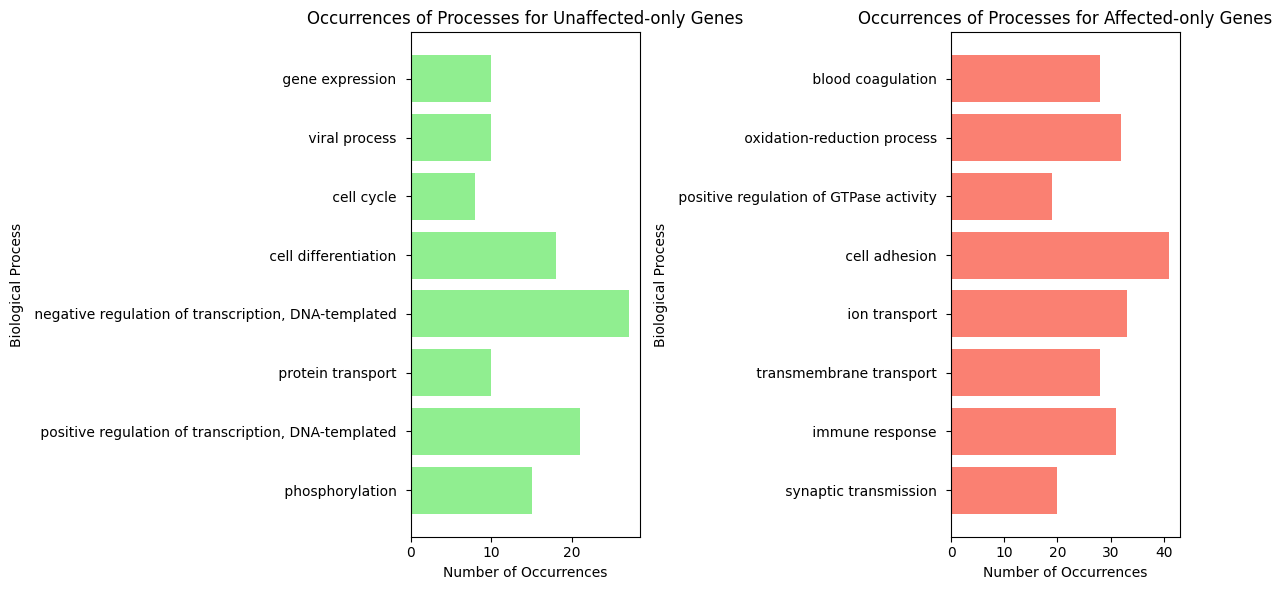

In [7]:
"""
Purpose:
Filtering out biological processes associated only with affected or unaffected genes and creating histograms to visualize their occurrences.

Variables:
- unaffected_only (set): Set of biological processes associated only with unaffected genes.
- affected_only (set): Set of biological processes associated only with affected genes.
- set_top_unaffected (set): Set of top 20 most common biological processes associated with unaffected genes.
- set_top_affected (set): Set of top 20 most common biological processes associated with affected genes.
- process_counts (Counter): Counter object containing the occurrences of each biological process.
"""

# Filtering out processes that are only associated with affected or unaffected genes
unaffected_only = set_top_unaffected - (set_top_unaffected & set_top_affected)
affected_only = set_top_affected - (set_top_unaffected & set_top_affected)

# Printing the processes and their categories
print("Biological Processes associated with Unaffected Genes only:")
for process in unaffected_only:
    print(process)

print("\nBiological Processes associated with Affected Genes only:")
for process in affected_only:
    print(process)

# Creating histograms for unaffected-only and affected-only genes
plt.figure(figsize=(12, 6))

# Histogram for unaffected-only genes
plt.subplot(1, 2, 1)
plt.barh(list(unaffected_only), [process_counts[process] for process in unaffected_only], color='lightgreen')
plt.xlabel('Number of Occurrences')
plt.ylabel('Biological Process')
plt.title('Occurrences of Processes for Unaffected-only Genes')

# Histogram for affected-only genes
plt.subplot(1, 2, 2)
plt.barh(list(affected_only), [process_counts[process] for process in affected_only], color='salmon')
plt.xlabel('Number of Occurrences')
plt.ylabel('Biological Process')
plt.title('Occurrences of Processes for Affected-only Genes')

plt.tight_layout()
plt.show()


In [8]:
print(genes_within_3_std_below.sort_values('log 2 fold change')[0:10])
print("............................................................")
print(genes_within_3_std_above.sort_values('log 2 fold change')[0:10])

            ID_REF   GSM701542    GSM701543  GSM701544  GSM701545  \
11357    201909_at   23.594124  6730.510700   8.786824   1.416715   
14447    205000_at   14.394637  2702.555200   5.774833   2.792695   
13857    204410_at    0.546206   433.723420   1.096738   0.544702   
20080    210697_at   11.307947    80.639170   0.239441   0.216572   
13856  204409_s_at    1.795170  1539.082000   9.464722   0.609398   
38806    229552_at  622.444030    29.855864   3.374142   2.041076   
41872    232618_at    9.838732   236.564820   0.586105   1.503442   
49107    239858_at    1.375085   159.947500   1.199083   0.893054   
14448  205001_s_at    7.521675  1474.857200   2.900976  17.406668   
37746    228492_at    4.837245   579.369500   6.344246   2.444833   

       no mutation   mutation  log 2 fold change  fold change  
11357  3377.052412   5.101770          -9.370551     0.001511  
14447  1358.474919   4.283764          -8.308893     0.003153  
13857   217.134813   0.820720          -8.047485

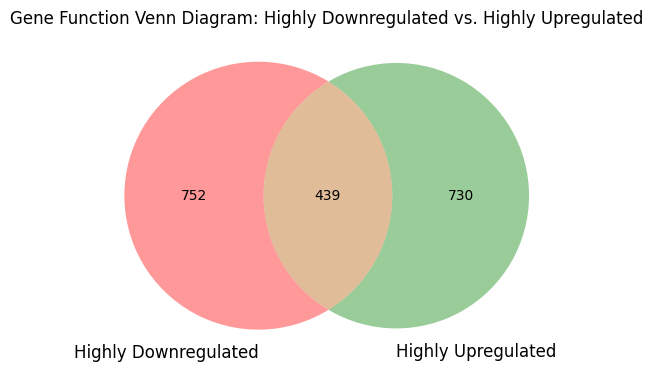

In [9]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Gene functions for highly downregulated genes
gene_ids_downregulated = df.loc[genes_within_3_std_below.index, 'ID_REF']
functions_downregulated = [process for gene_id in gene_ids_downregulated for process in gene_functions.get(gene_id, [])]

# Gene functions for highly upregulated genes
gene_ids_upregulated = df.loc[genes_within_3_std_above.index, 'ID_REF']
functions_upregulated = [process for gene_id in gene_ids_upregulated for process in gene_functions.get(gene_id, [])]

# Creating sets of gene functions
set_downregulated = set(functions_downregulated)
set_upregulated = set(functions_upregulated)

# Plotting Venn Diagram
plt.figure(figsize=(6, 6))
venn2([set_downregulated, set_upregulated], ('Highly Downregulated', 'Highly Upregulated'))
plt.title('Gene Function Venn Diagram: Highly Downregulated vs. Highly Upregulated')
plt.show()


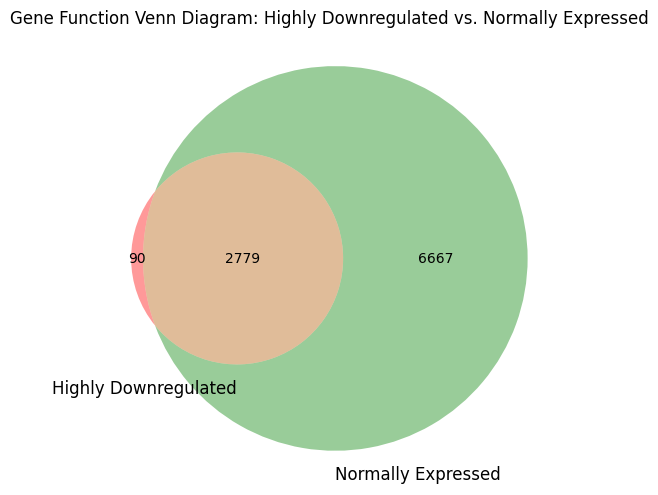

In [10]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib_venn import venn2

# Step 1: Identify highly downregulated genes (log2 fold change < 2 std below the mean)
df_filtered = df.dropna(axis=0)
mu, std = norm.fit(df_filtered['log 2 fold change'])
std_2_below = mu - 2 * std
highly_downregulated = df[df['log 2 fold change'] < std_2_below]

# Step 2: Identify normally expressed genes (-1 std < log2 fold change < 1 std)
std_1_above = mu + std
std_1_below = mu - std
normally_expressed = df[(df['log 2 fold change'] > std_1_below) & (df['log 2 fold change'] < std_1_above)]

# Step 3: Extract gene functions
gene_ids_downregulated = df.loc[highly_downregulated.index, 'ID_REF']
gene_ids_normal = df.loc[normally_expressed.index, 'ID_REF']

# Match gene IDs to additional data and extract functions
matched_gene_id_downregulated = []
matched_gene_id_normal = []
for a in ab['ID']:
    if a in gene_ids_downregulated.values:
        matched_gene_id_downregulated.append(a)
    if a in gene_ids_normal.values:
        matched_gene_id_normal.append(a)

gene_function_downregulated = {}
gene_function_normal = {}

# Populating the dictionaries with gene functions
for index, row in ab.iterrows():
    if row['ID'] in matched_gene_id_downregulated:
        gene_function_downregulated[row['ID']] = [ex.split("//")[1] for ex in str(row['Gene Ontology Biological Process']).split("///") if ex != "nan"]
    if row['ID'] in matched_gene_id_normal:
        gene_function_normal[row['ID']] = [ex.split("//")[1] for ex in str(row['Gene Ontology Biological Process']).split("///") if ex != "nan"]

# Step 4: Create sets of gene functions
downregulated_functions = {process for processes in gene_function_downregulated.values() for process in processes}
normal_functions = {process for processes in gene_function_normal.values() for process in processes}

# Step 5: Generate the Venn diagram
plt.figure(figsize=(6, 6))
venn2([downregulated_functions, normal_functions], ('Highly Downregulated', 'Normally Expressed'))
plt.title('Gene Function Venn Diagram: Highly Downregulated vs. Normally Expressed')
plt.show()


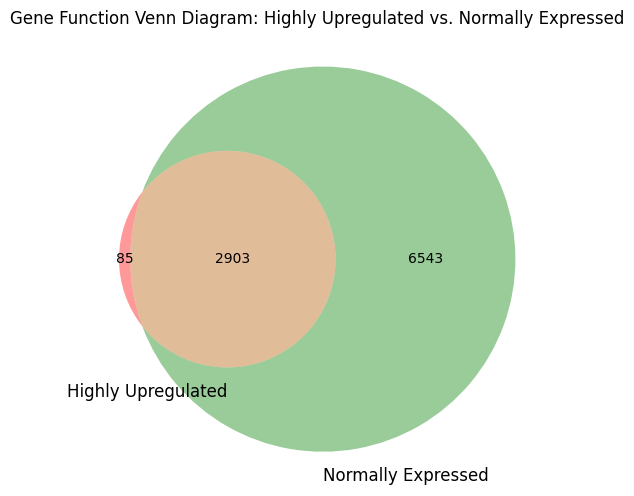

In [11]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib_venn import venn2

# Assuming 'df' is the primary dataset with log2 fold changes and 'ab' is the dataset with gene annotations

# Step 1: Identify highly upregulated genes (log2 fold change > 2 std above the mean)
df_filtered = df.dropna(axis=0)
mu, std = norm.fit(df_filtered['log 2 fold change'])
std_2_above = mu + 2 * std
highly_upregulated = df[df['log 2 fold change'] > std_2_above]

# Step 2: Identify normally expressed genes (-1 std < log2 fold change < 1 std)
std_1_above = mu + std
std_1_below = mu - std
normally_expressed = df[(df['log 2 fold change'] > std_1_below) & (df['log 2 fold change'] < std_1_above)]

# Step 3: Extract gene functions
gene_ids_upregulated = df.loc[highly_upregulated.index, 'ID_REF']
gene_ids_normal = df.loc[normally_expressed.index, 'ID_REF']

# Match gene IDs to additional data and extract functions
matched_gene_id_upregulated = []
matched_gene_id_normal = []
for a in ab['ID']:
    if a in gene_ids_upregulated.values:
        matched_gene_id_upregulated.append(a)
    if a in gene_ids_normal.values:
        matched_gene_id_normal.append(a)

gene_function_upregulated = {}
gene_function_normal = {}

# Populating the dictionaries with gene functions
for index, row in ab.iterrows():
    if row['ID'] in matched_gene_id_upregulated:
        gene_function_upregulated[row['ID']] = [ex.split("//")[1] for ex in str(row['Gene Ontology Biological Process']).split("///") if ex != "nan"]
    if row['ID'] in matched_gene_id_normal:
        gene_function_normal[row['ID']] = [ex.split("//")[1] for ex in str(row['Gene Ontology Biological Process']).split("///") if ex != "nan"]

# Step 4: Create sets of gene functions
upregulated_functions = {process for processes in gene_function_upregulated.values() for process in processes}
normal_functions = {process for processes in gene_function_normal.values() for process in processes}

# Step 5: Generate the Venn diagram
plt.figure(figsize=(6, 6))
venn2([upregulated_functions, normal_functions], ('Highly Upregulated', 'Normally Expressed'))
plt.title('Gene Function Venn Diagram: Highly Upregulated vs. Normally Expressed')
plt.show()


Top 20 Upregulated Gene Functions:
 signal transduction : 57
 regulation of transcription, DNA-templated : 41
 transcription, DNA-templated : 35
 multicellular organismal development : 29
 cell adhesion : 25
 G-protein coupled receptor signaling pathway : 23
 innate immune response : 23
 positive regulation of transcription from RNA polymerase II promoter : 22
 small molecule metabolic process : 22
 metabolic process : 20
 transport : 19
 immune response : 19
 negative regulation of transcription from RNA polymerase II promoter : 18
 proteolysis : 17
 cytokine-mediated signaling pathway : 17
 blood coagulation : 17
 negative regulation of transcription, DNA-templated : 16
 extracellular matrix organization : 15
 oxidation-reduction process : 15
 cell differentiation : 13

Top 20 Downregulated Gene Functions:
 transport : 41
 regulation of transcription, DNA-templated : 41
 transcription, DNA-templated : 40
 signal transduction : 37
 small molecule metabolic process : 22
 ion transport 

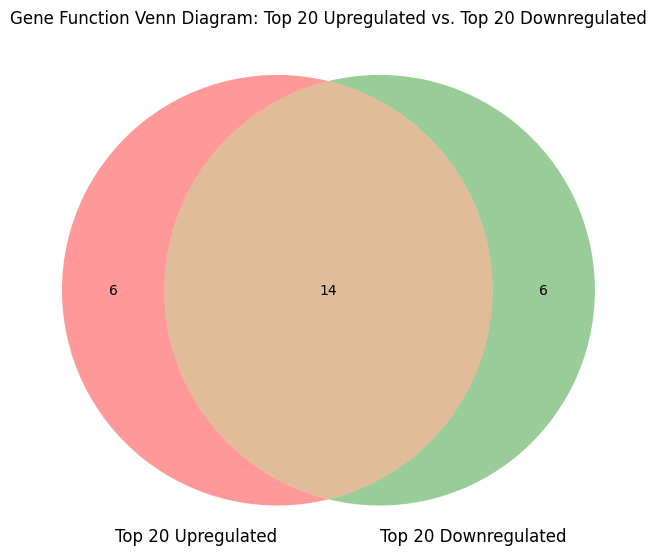

In [12]:
# Fit a normal distribution to the log2 fold change data
df_filtered = df.dropna(axis=0)
mu, std = norm.fit(df_filtered['log 2 fold change'])

# Identify highly upregulated and downregulated genes
std_3_above = mu + 3 * std
std_3_below = mu - 3 * std
highly_upregulated = df[df['log 2 fold change'] > std_3_above]
highly_downregulated = df[df['log 2 fold change'] < std_3_below]

# Extract gene functions
gene_ids_upregulated = df.loc[highly_upregulated.index, 'ID_REF']
gene_ids_downregulated = df.loc[highly_downregulated.index, 'ID_REF']

# Match gene IDs to additional data and extract functions
matched_gene_id_upregulated = []
matched_gene_id_downregulated = []
for a in ab['ID']:
    if a in gene_ids_upregulated.values:
        matched_gene_id_upregulated.append(a)
    if a in gene_ids_downregulated.values:
        matched_gene_id_downregulated.append(a)

gene_function_upregulated = {}
gene_function_downregulated = {}

# Populating the dictionaries with gene functions
for index, row in ab.iterrows():
    if row['ID'] in matched_gene_id_upregulated:
        gene_function_upregulated[row['ID']] = [ex.split("//")[1] for ex in str(row['Gene Ontology Biological Process']).split("///") if ex != "nan"]
    if row['ID'] in matched_gene_id_downregulated:
        gene_function_downregulated[row['ID']] = [ex.split("//")[1] for ex in str(row['Gene Ontology Biological Process']).split("///") if ex != "nan"]

# Count the occurrences of each gene function
upregulated_functions = [func for functions in gene_function_upregulated.values() for func in functions]
downregulated_functions = [func for functions in gene_function_downregulated.values() for func in functions]

upregulated_counter = pd.Series(upregulated_functions).value_counts()
downregulated_counter = pd.Series(downregulated_functions).value_counts()

# Identify the top 20 gene functions for each category
top_20_upregulated = upregulated_counter.head(20)
top_20_downregulated = downregulated_counter.head(20)

# Print the top 20 gene functions for each category
print("Top 20 Upregulated Gene Functions:")
for function, count in top_20_upregulated.items():
    print(f"{function}: {count}")

print("\nTop 20 Downregulated Gene Functions:")
for function, count in top_20_downregulated.items():
    print(f"{function}: {count}")

# Create sets of top gene functions for Venn diagram
upregulated_functions_set = set(top_20_upregulated.index)
downregulated_functions_set = set(top_20_downregulated.index)

# Generate the Venn diagram
plt.figure(figsize=(8, 8))
venn2([upregulated_functions_set, downregulated_functions_set], ('Top 20 Upregulated', 'Top 20 Downregulated'))
plt.title('Gene Function Venn Diagram: Top 20 Upregulated vs. Top 20 Downregulated')
plt.show()


Number of genes with specified functions within 1 standard deviation above the mean (transmembrane transport): 241
Number of genes with specified functions within 1 standard deviation below the mean (transmembrane transport): 289
Number of genes with specified functions within 3 standard deviations above the mean (transmembrane transport): 14
Number of genes with specified functions within 3 standard deviations below the mean (transmembrane transport): 30
Average Log 2 fold change : -0.4560472532897014
Number of genes with specified functions within 1 standard deviation above the mean (immune response): 299
Number of genes with specified functions within 1 standard deviation below the mean (immune response): 312
Number of genes with specified functions within 3 standard deviations above the mean (immune response): 27
Number of genes with specified functions within 3 standard deviations below the mean (immune response): 15
Average Log 2 fold change : -0.3193776308358719
Number of genes 

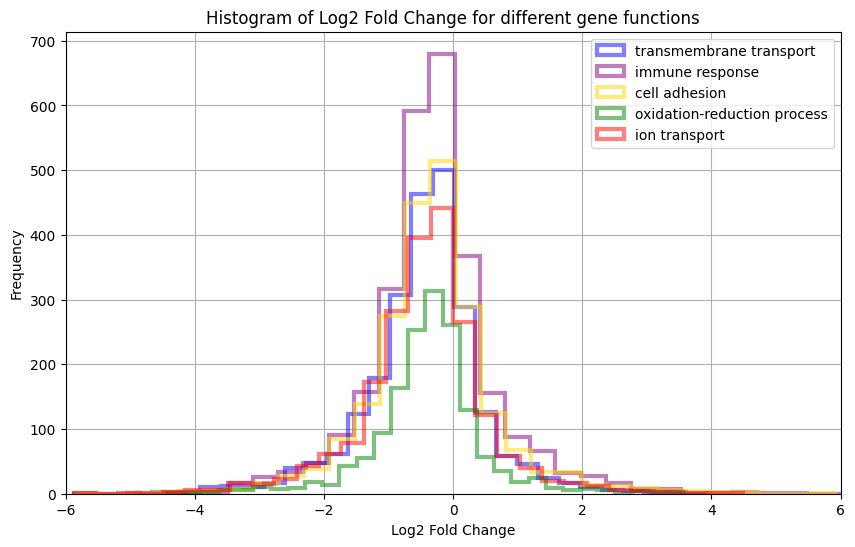

In [13]:
# Define the functions of interest
functions_of_interest1 = ["transmembrane transport"]
functions_of_interest2 = ["immune response"]
functions_of_interest3 = ["cell adhesion"]
functions_of_interest4 = ["oxidation-reduction process"]
functions_of_interest5 = ["ion transport"]

# Filter genes with specified functions from additional data (ab)
genes_of_interest1 = ab[ab['Gene Ontology Biological Process'].str.contains('|'.join(functions_of_interest1), na=False)]
genes_of_interest2 = ab[ab['Gene Ontology Biological Process'].str.contains('|'.join(functions_of_interest2), na=False)]
genes_of_interest3 = ab[ab['Gene Ontology Biological Process'].str.contains('|'.join(functions_of_interest3), na=False)]
genes_of_interest4 = ab[ab['Gene Ontology Biological Process'].str.contains('|'.join(functions_of_interest4), na=False)]
genes_of_interest5 = ab[ab['Gene Ontology Biological Process'].str.contains('|'.join(functions_of_interest5), na=False)]

# Filter main dataset (df) to include only these genes
genes_of_interest_filtered1 = df[df['ID_REF'].isin(genes_of_interest1['ID'])]
genes_of_interest_filtered2 = df[df['ID_REF'].isin(genes_of_interest2['ID'])]
genes_of_interest_filtered3 = df[df['ID_REF'].isin(genes_of_interest3['ID'])]
genes_of_interest_filtered4 = df[df['ID_REF'].isin(genes_of_interest4['ID'])]
genes_of_interest_filtered5 = df[df['ID_REF'].isin(genes_of_interest5['ID'])]

# Calculate mean and standard deviation of 'log 2 fold change' for these genes
mu_interest1, std_interest1 = norm.fit(genes_of_interest_filtered1['log 2 fold change'].astype(float))
mu_interest2, std_interest2 = norm.fit(genes_of_interest_filtered2['log 2 fold change'].astype(float))
mu_interest3, std_interest3 = norm.fit(genes_of_interest_filtered3['log 2 fold change'].astype(float))
mu_interest4, std_interest4 = norm.fit(genes_of_interest_filtered4['log 2 fold change'].astype(float))
mu_interest5, std_interest5 = norm.fit(genes_of_interest_filtered5['log 2 fold change'].astype(float))

# Calculate number of genes within specific standard deviations
genes_within_1_std_above1 = genes_of_interest_filtered1[genes_of_interest_filtered1['log 2 fold change'].astype(float) > (mu_interest1 + std_interest1)]
genes_within_1_std_below1 = genes_of_interest_filtered1[genes_of_interest_filtered1['log 2 fold change'].astype(float) < (mu_interest1 - std_interest1)]
genes_within_3_std_above1 = genes_of_interest_filtered1[genes_of_interest_filtered1['log 2 fold change'].astype(float) > (mu_interest1 + 3 * std_interest1)]
genes_within_3_std_below1 = genes_of_interest_filtered1[genes_of_interest_filtered1['log 2 fold change'].astype(float) < (mu_interest1 - 3 * std_interest1)]

genes_within_1_std_above2 = genes_of_interest_filtered2[genes_of_interest_filtered2['log 2 fold change'].astype(float) > (mu_interest2 + std_interest2)]
genes_within_1_std_below2 = genes_of_interest_filtered2[genes_of_interest_filtered2['log 2 fold change'].astype(float) < (mu_interest2 - std_interest2)]
genes_within_3_std_above2 = genes_of_interest_filtered2[genes_of_interest_filtered2['log 2 fold change'].astype(float) > (mu_interest2 + 3 * std_interest2)]
genes_within_3_std_below2 = genes_of_interest_filtered2[genes_of_interest_filtered2['log 2 fold change'].astype(float) < (mu_interest2 - 3 * std_interest2)]

genes_within_1_std_above3 = genes_of_interest_filtered3[genes_of_interest_filtered3['log 2 fold change'].astype(float) > (mu_interest3 + std_interest3)]
genes_within_1_std_below3 = genes_of_interest_filtered3[genes_of_interest_filtered3['log 2 fold change'].astype(float) < (mu_interest3 - std_interest3)]
genes_within_3_std_above3 = genes_of_interest_filtered3[genes_of_interest_filtered3['log 2 fold change'].astype(float) > (mu_interest3 + 3 * std_interest3)]
genes_within_3_std_below3 = genes_of_interest_filtered3[genes_of_interest_filtered3['log 2 fold change'].astype(float) < (mu_interest3 - 3 * std_interest3)]

genes_within_1_std_above4 = genes_of_interest_filtered4[genes_of_interest_filtered4['log 2 fold change'].astype(float) > (mu_interest4 + std_interest4)]
genes_within_1_std_below4 = genes_of_interest_filtered4[genes_of_interest_filtered4['log 2 fold change'].astype(float) < (mu_interest4 - std_interest4)]
genes_within_3_std_above4 = genes_of_interest_filtered4[genes_of_interest_filtered4['log 2 fold change'].astype(float) > (mu_interest4 + 3 * std_interest4)]
genes_within_3_std_below4 = genes_of_interest_filtered4[genes_of_interest_filtered4['log 2 fold change'].astype(float) < (mu_interest4 - 3 * std_interest4)]

genes_within_1_std_above5 = genes_of_interest_filtered5[genes_of_interest_filtered5['log 2 fold change'].astype(float) > (mu_interest5 + std_interest5)]
genes_within_1_std_below5 = genes_of_interest_filtered5[genes_of_interest_filtered5['log 2 fold change'].astype(float) < (mu_interest5 - std_interest5)]
genes_within_3_std_above5 = genes_of_interest_filtered5[genes_of_interest_filtered5['log 2 fold change'].astype(float) > (mu_interest5 + 3 * std_interest5)]
genes_within_3_std_below5 = genes_of_interest_filtered5[genes_of_interest_filtered5['log 2 fold change'].astype(float) < (mu_interest5 - 3 * std_interest5)]

# Print the number of genes within each standard deviation
print("Number of genes with specified functions within 1 standard deviation above the mean (transmembrane transport):", len(genes_within_1_std_above1))
print("Number of genes with specified functions within 1 standard deviation below the mean (transmembrane transport):", len(genes_within_1_std_below1))
print("Number of genes with specified functions within 3 standard deviations above the mean (transmembrane transport):", len(genes_within_3_std_above1))
print("Number of genes with specified functions within 3 standard deviations below the mean (transmembrane transport):", len(genes_within_3_std_below1))
print("Average Log 2 fold change :", mu_interest1)

print("Number of genes with specified functions within 1 standard deviation above the mean (immune response):", len(genes_within_1_std_above2))
print("Number of genes with specified functions within 1 standard deviation below the mean (immune response):", len(genes_within_1_std_below2))
print("Number of genes with specified functions within 3 standard deviations above the mean (immune response):", len(genes_within_3_std_above2))
print("Number of genes with specified functions within 3 standard deviations below the mean (immune response):", len(genes_within_3_std_below2))
print("Average Log 2 fold change :", mu_interest2)

print("Number of genes with specified functions within 1 standard deviation above the mean (cell adhesion):", len(genes_within_1_std_above3))
print("Number of genes with specified functions within 1 standard deviation below the mean (cell adhesion):", len(genes_within_1_std_below3))
print("Number of genes with specified functions within 3 standard deviations above the mean (cell adhesion):", len(genes_within_3_std_above3))
print("Number of genes with specified functions within 3 standard deviations below the mean (cell adhesion):", len(genes_within_3_std_below3))
print("Average Log 2 fold change :", mu_interest3)

print("Number of genes with specified functions within 1 standard deviation above the mean (oxidation-reduction process):", len(genes_within_1_std_above4))
print("Number of genes with specified functions within 1 standard deviation below the mean (oxidation-reduction process):", len(genes_within_1_std_below4))
print("Number of genes with specified functions within 3 standard deviations above the mean (oxidation-reduction process):", len(genes_within_3_std_above4))
print("Number of genes with specified functions within 3 standard deviations below the mean (oxidation-reduction process):", len(genes_within_3_std_below4))
print("Average Log 2 fold change :", mu_interest4)

print("Number of genes with specified functions within 1 standard deviation above the mean (ion transport):", len(genes_within_1_std_above5))
print("Number of genes with specified functions within 1 standard deviation below the mean (ion transport):", len(genes_within_1_std_below5))
print("Number of genes with specified functions within 3 standard deviations above the mean (ion transport):", len(genes_within_3_std_above5))
print("Number of genes with specified functions within 3 standard deviations below the mean (ion transport):", len(genes_within_3_std_below5))
print("Average Log 2 fold change :", mu_interest5)

# Plotting histogram of log 2 fold change for genes with specified functions
plt.figure(figsize=(10, 6))
plt.hist(genes_of_interest_filtered1['log 2 fold change'].astype(float), bins=30, edgecolor='blue',alpha = 0.5, lw=3,histtype = 'step',label='transmembrane transport')
plt.hist(genes_of_interest_filtered2['log 2 fold change'].astype(float), bins=30, edgecolor='purple',alpha = 0.5, lw=3,histtype = 'step',label= 'immune response')
plt.hist(genes_of_interest_filtered3['log 2 fold change'].astype(float), bins=30, edgecolor='gold',alpha = 0.5, lw=3,histtype = 'step',label= 'cell adhesion')
plt.hist(genes_of_interest_filtered4['log 2 fold change'].astype(float), bins=30, edgecolor='green',alpha = 0.5, lw=3,histtype = 'step',label= 'oxidation-reduction process')
plt.hist(genes_of_interest_filtered5['log 2 fold change'].astype(float), bins=30, edgecolor='red',alpha = 0.5, lw=3,histtype = 'step',label= 'ion transport')
plt.title('Histogram of Log2 Fold Change for different gene functions')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Frequency')
plt.xlim(-6,6)
plt.grid(True)

# Adding normal distribution curve
plt.legend()
plt.show()


In [21]:
import scipy.stats
from scipy.stats import anderson
from random import sample
sample_1=sample(list(df['log 2 fold change']), 2000)
anderson(sample_1)

AndersonResult(statistic=29.110314701633342, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.4121660390435399, scale=0.8976977557190149)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [15]:
from scipy.stats import kstest
from random import sample
sample_2=sample(list(df['log 2 fold change']), 2000)
kstest(sample_2, scipy.stats.norm.cdf)


KstestResult(statistic=0.262544678861823, pvalue=3.881362644409338e-122, statistic_location=0.1116645888, statistic_sign=1)

In [16]:
from scipy.stats import shapiro
from random import sample
sample_3=sample(list(df['log 2 fold change']), 2000)
shapiro(sample_3)

ShapiroResult(statistic=0.9408563744724887, pvalue=1.5033472986995412e-27)

In [18]:
from scipy.stats import jarque_bera
from random import sample
sample_4=sample(list(df['log 2 fold change']), 2000)
jarque_bera(sample_4)

SignificanceResult(statistic=1112.8220637918268, pvalue=2.2581832281429684e-242)